In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('House1.csv')
df['Time']= pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406748 entries, 0 to 406747
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Time                406748 non-null  datetime64[ns]
 1   mains_1             406748 non-null  float64       
 2   mains_2             406748 non-null  float64       
 3   oven_3              406748 non-null  float64       
 4   oven_4              406748 non-null  float64       
 5   refrigerator_5      406748 non-null  float64       
 6   dishwaser_6         406748 non-null  float64       
 7   kitchen_outlets_7   406748 non-null  float64       
 8   kitchen_outlets_8   406748 non-null  float64       
 9   lighting_9          406748 non-null  float64       
 10  washer_dryer_10     406748 non-null  float64       
 11  microwave_11        406748 non-null  float64       
 12  bathroom_gfi_12     406748 non-null  float64       
 13  electric_heat_13    406748 no

In [3]:
df.describe()

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
count,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000,406748.000000
mean,227.353130,156.143288,6.206361,7.742122,55.504096,24.917698,21.236535,28.331126,43.300198,3.912454,22.259810,6.998749,0.127590,0.115049,5.501908,2.028563,18.042355,13.307077,0.000080,31.854262
std,409.695428,425.762416,100.255472,126.784783,89.149730,149.718191,1.958581,16.799793,45.931033,42.428219,164.229323,97.137862,1.073337,0.872150,68.599415,54.460008,29.972681,22.678864,0.029595,291.610783
min,51.870000,36.720000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.120000,38.910000,0.000000,0.000000,6.000000,0.000000,20.000000,21.000000,2.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,130.380000,41.670000,0.000000,0.000000,7.000000,0.000000,21.000000,22.000000,42.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,234.460000,118.670000,0.000000,0.000000,181.000000,0.000000,22.000000,23.000000,81.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,64.000000,9.000000,0.000000,0.000000
max,6081.360000,6288.420000,1725.000000,2565.000000,2359.000000,1422.000000,59.000000,1550.000000,363.000000,4475.000000,2906.000000,1686.000000,192.000000,36.000000,1118.000000,1585.000000,112.000000,90.000000,17.500000,3222.500000


In [4]:
dates = {}
dates = [str(time)[:10] for time in df.Time.values]
dates = sorted(list(set(dates)))
print('House {0} data contain {1} days from {2} to {3}.'.format(1,len(dates),dates[0], dates[-1]))

House 1 data contain 23 days from 2011-04-18 to 2011-05-24.


In [5]:
df['Year'] = df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour
df

,Time,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,...,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20,Year,Month,Day,Hour
0,2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
1,2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
2,2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
3,2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,...,1.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
4,2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406743,2011-05-24 19:56:20,235.73,38.65,0.0,0.0,186.0,1.0,26.0,20.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2011,5,24,19
406744,2011-05-24 19:56:23,235.03,38.66,0.0,0.0,187.0,0.0,24.0,20.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2011,5,24,19
406745,2011-05-24 19:56:27,235.46,38.61,0.0,0.0,190.0,0.0,24.0,20.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2011,5,24,19
406746,2011-05-24 19:56:30,235.98,38.77,0.0,0.0,189.0,0.0,24.0,20.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2011,5,24,19


In [6]:
df = df.loc[(df['Day'].isin([18,19]))&(df['Month'].isin([4]))]
df


,Time,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,...,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20,Year,Month,Day,Hour
0,2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
1,2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
2,2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
3,2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,...,1.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
4,2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,...,2.0,0.0,65.0,46.0,0.0,0.0,2011,4,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31412,2011-04-19 22:44:55,197.89,188.94,0.0,0.0,6.0,0.0,20.0,73.0,81.0,...,1.0,0.0,64.0,56.0,0.0,0.0,2011,4,19,22
31413,2011-04-19 22:44:59,198.90,189.84,0.0,0.0,6.0,0.0,20.0,75.0,81.0,...,1.0,0.0,64.0,56.0,0.0,0.0,2011,4,19,22
31414,2011-04-19 22:45:02,199.47,195.99,0.0,0.0,7.0,0.0,20.0,70.0,80.0,...,1.0,0.0,64.0,56.0,0.0,0.0,2011,4,19,22
31415,2011-04-19 22:45:06,199.19,197.76,0.0,0.0,6.0,0.0,22.0,77.0,81.0,...,1.0,0.0,64.0,56.0,0.0,0.0,2011,4,19,22




                                                       HOUSE 1




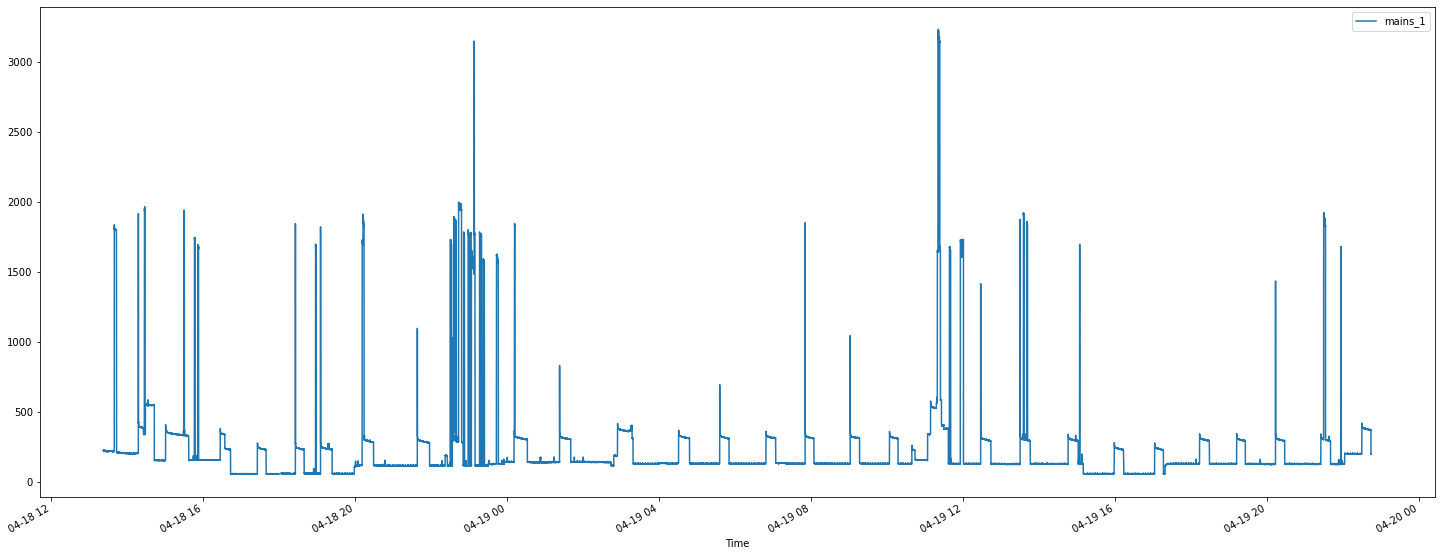

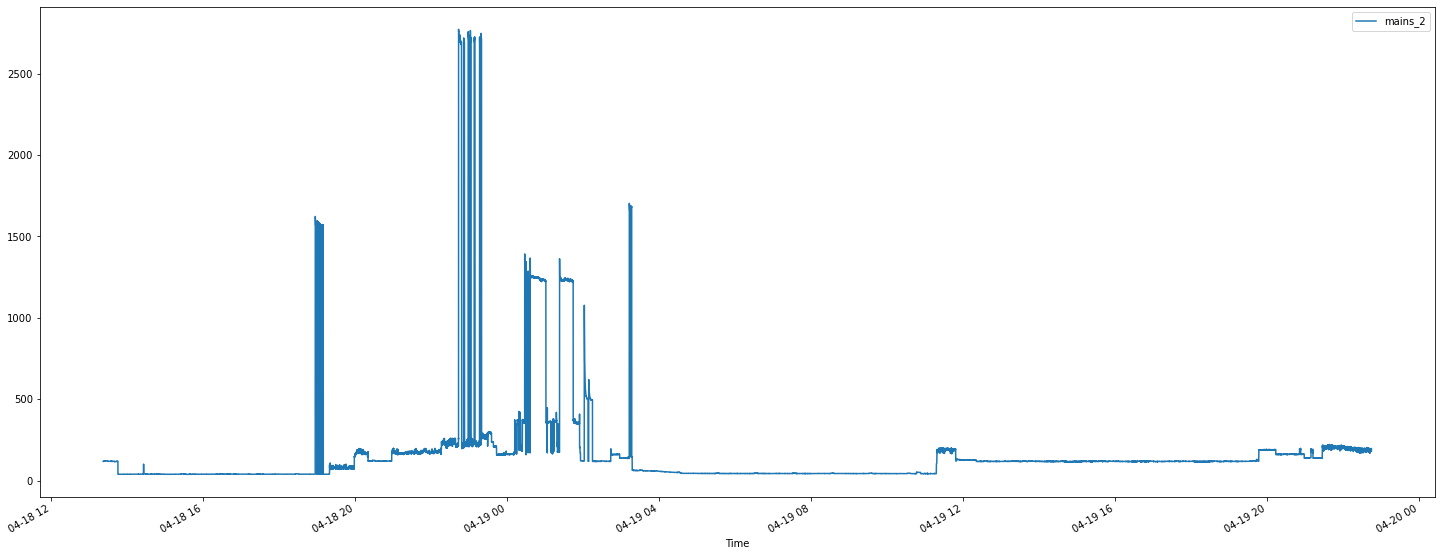

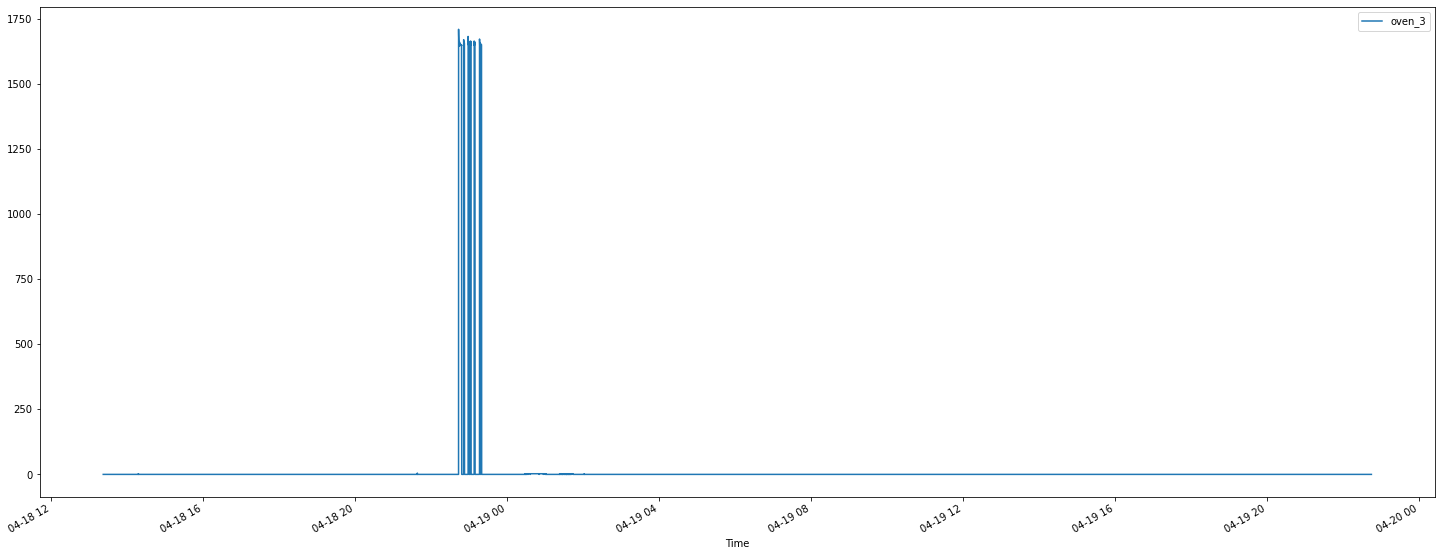

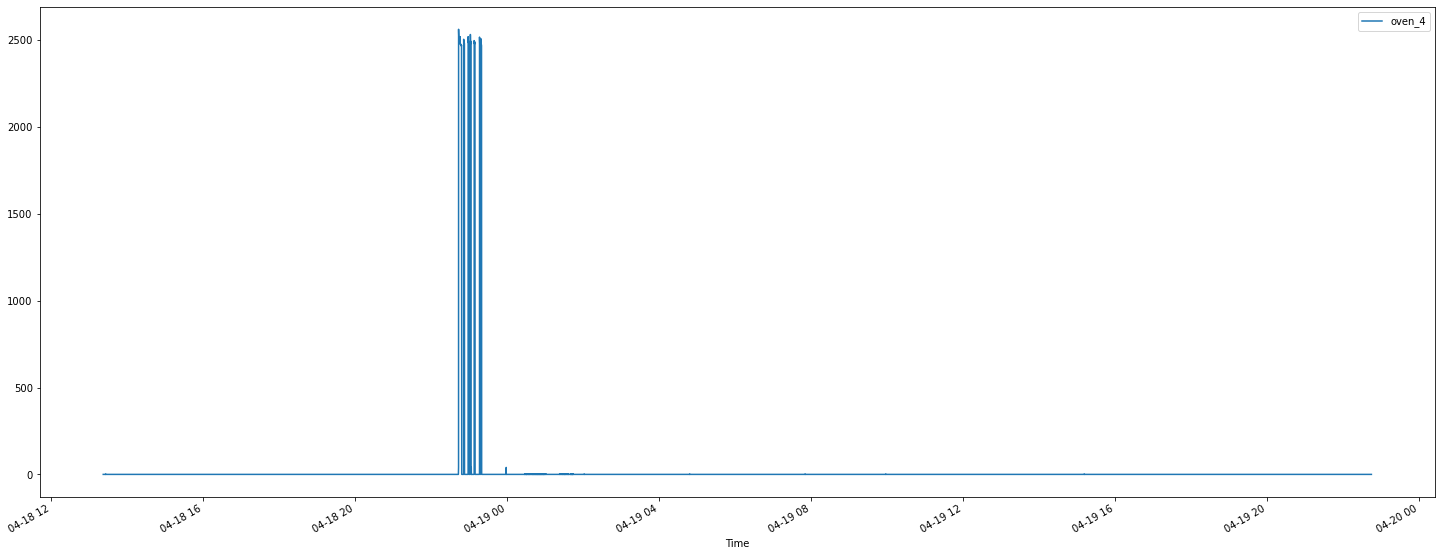

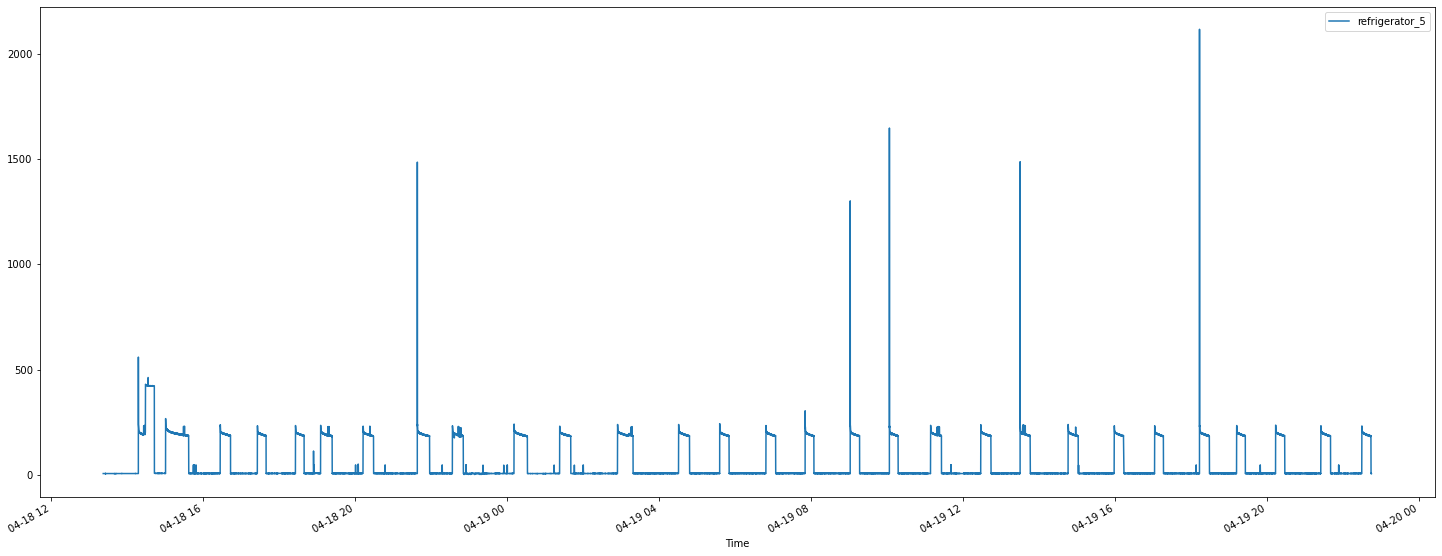

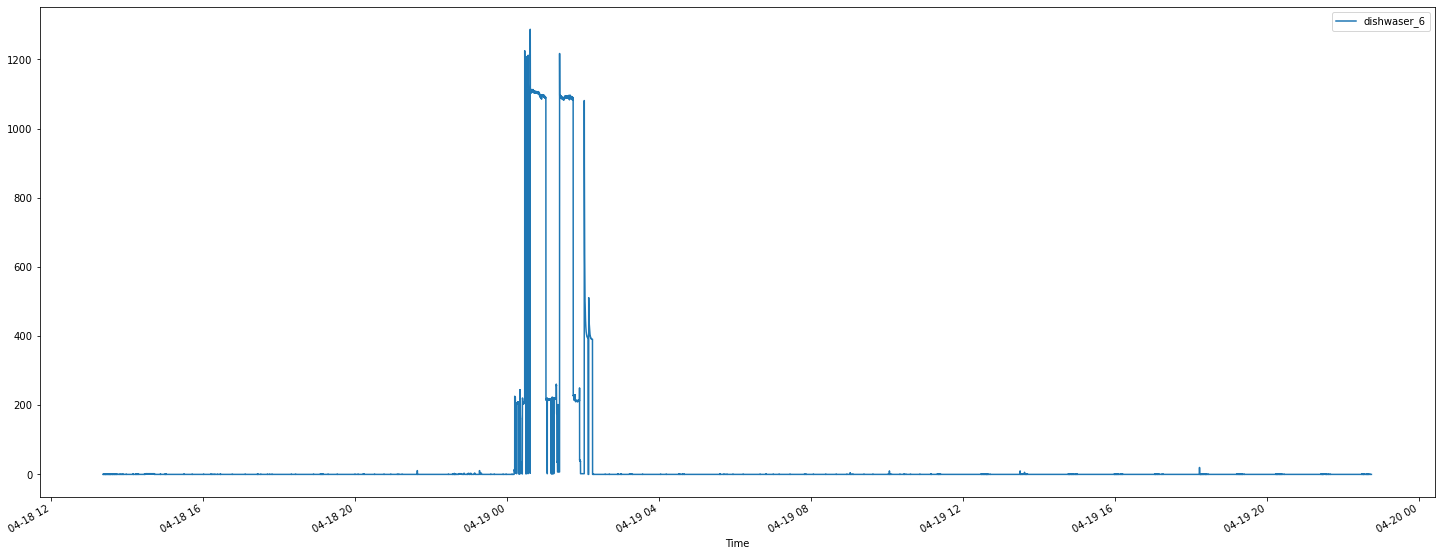

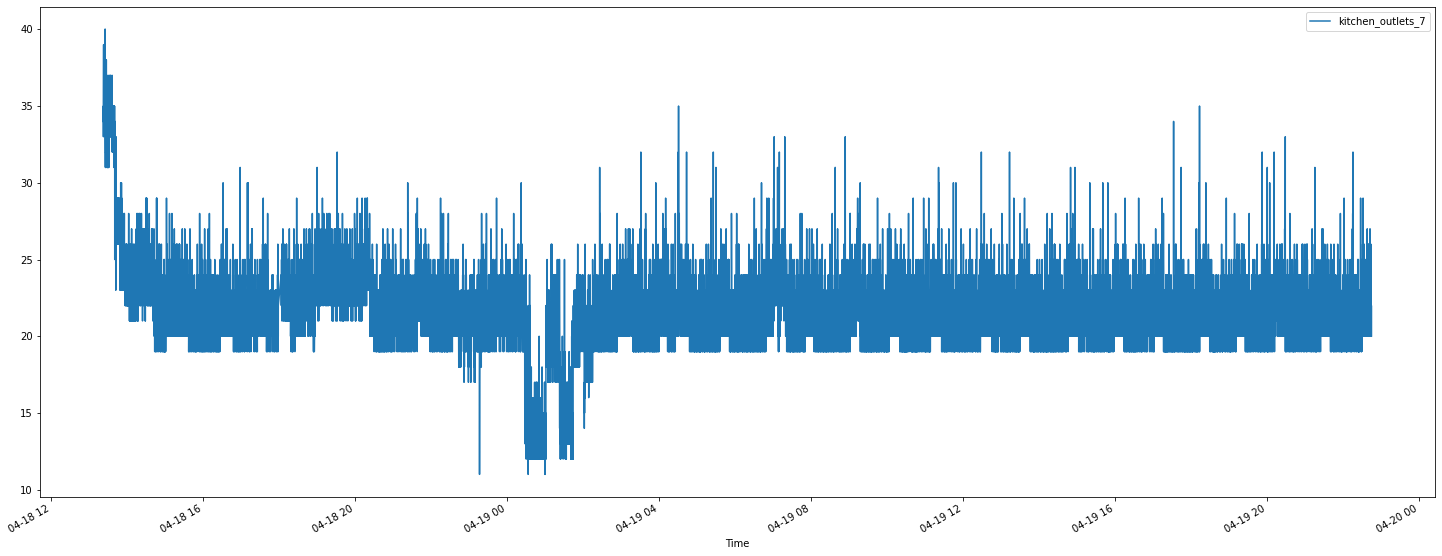

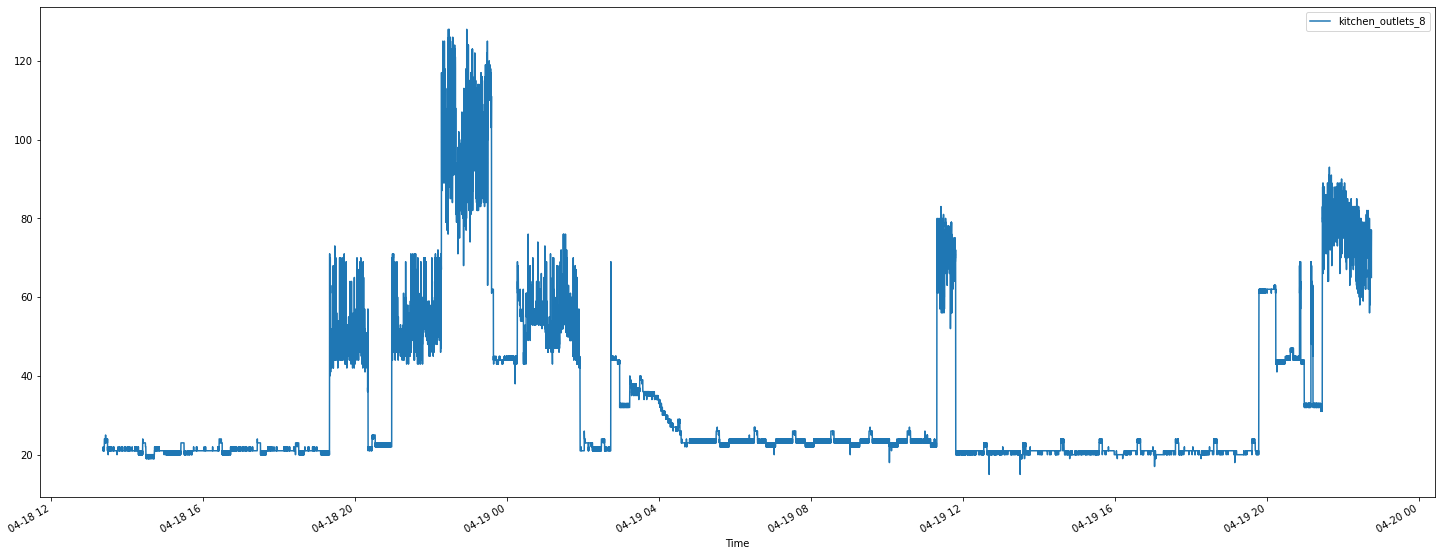

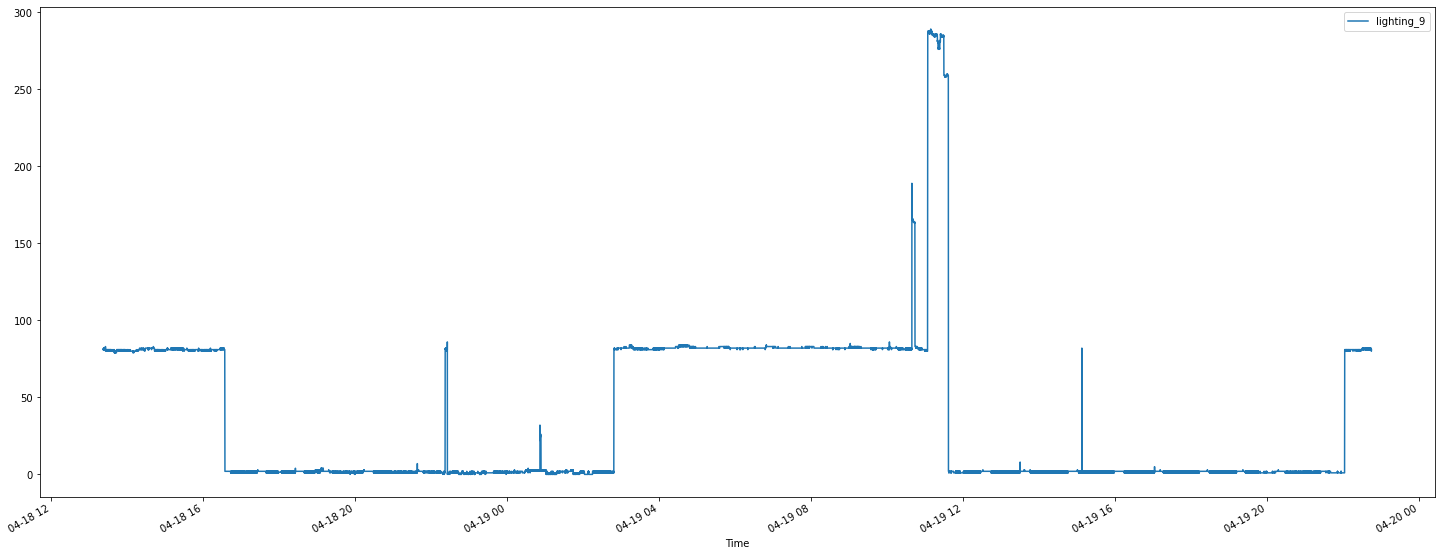

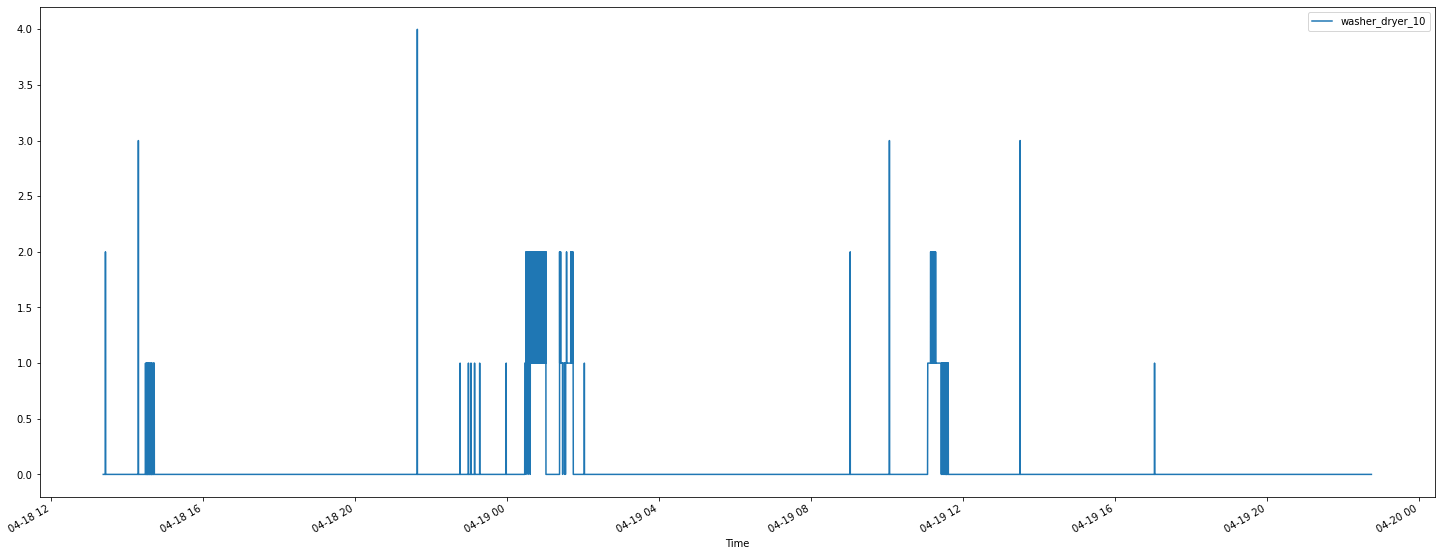

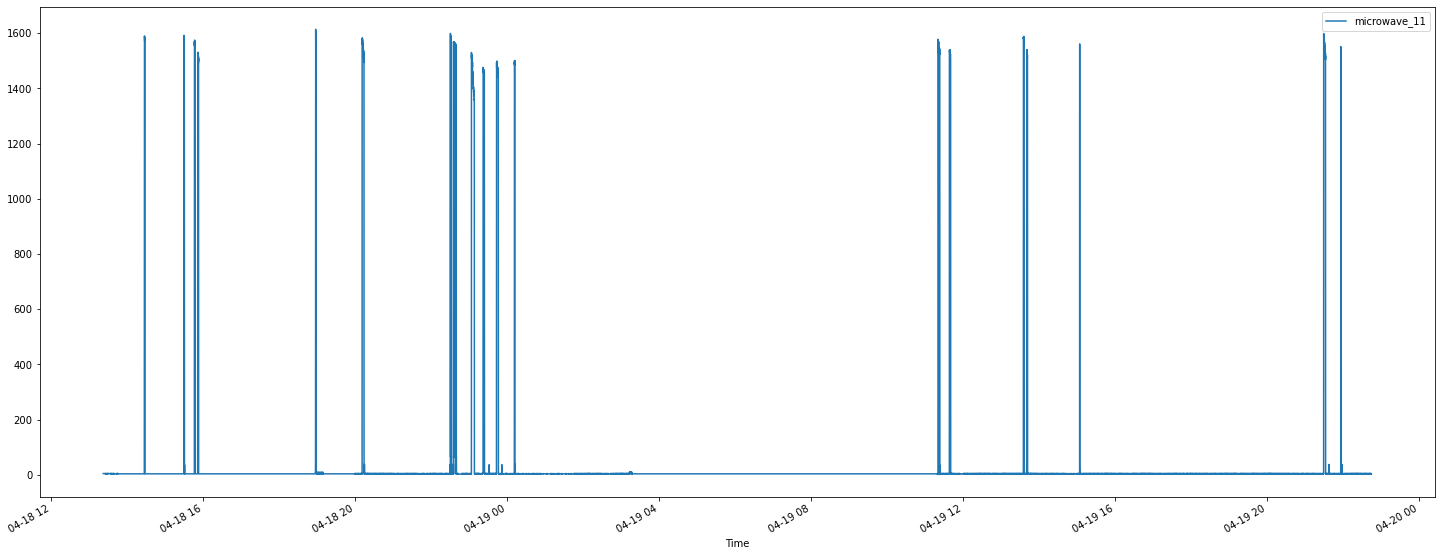

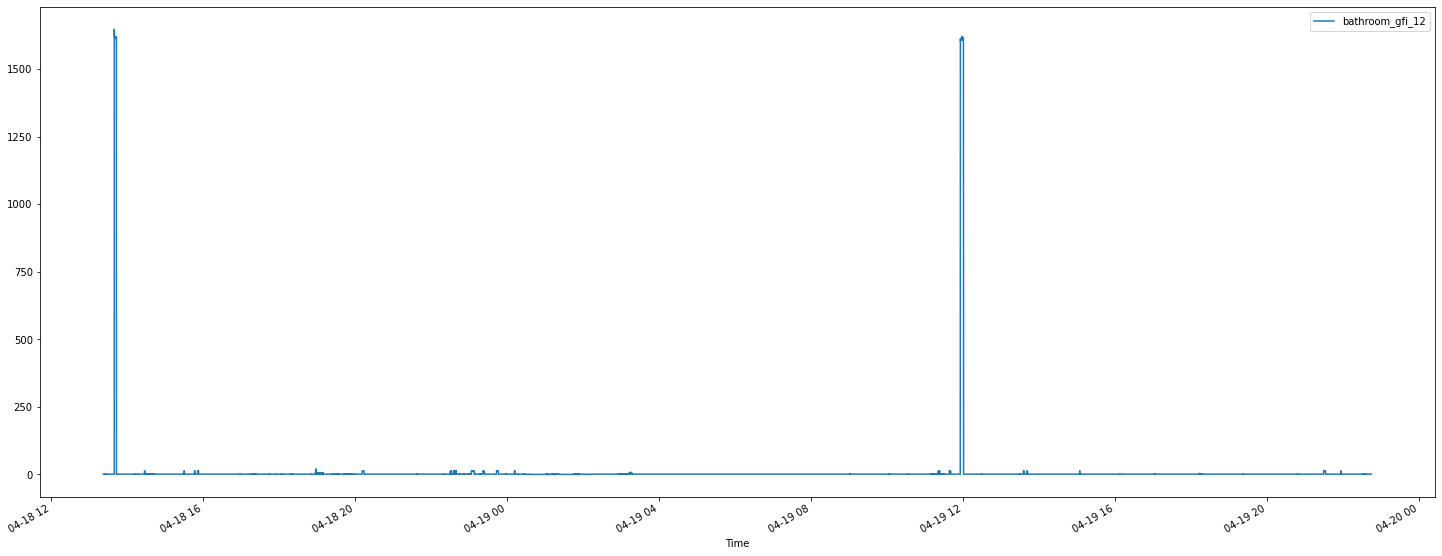

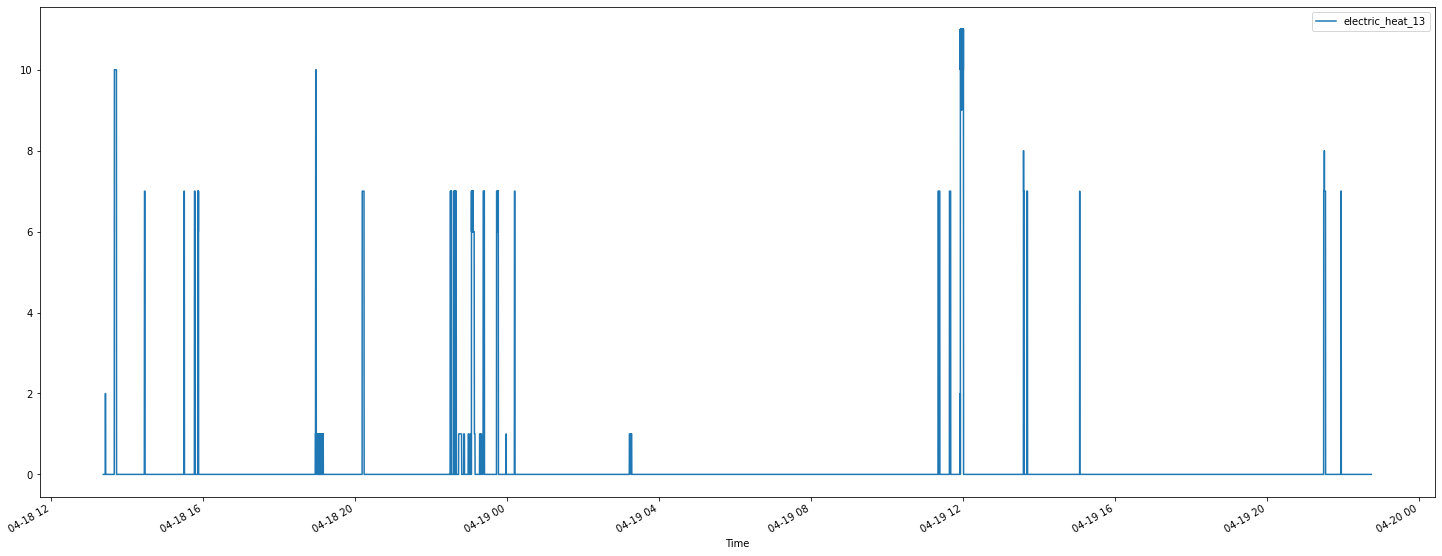

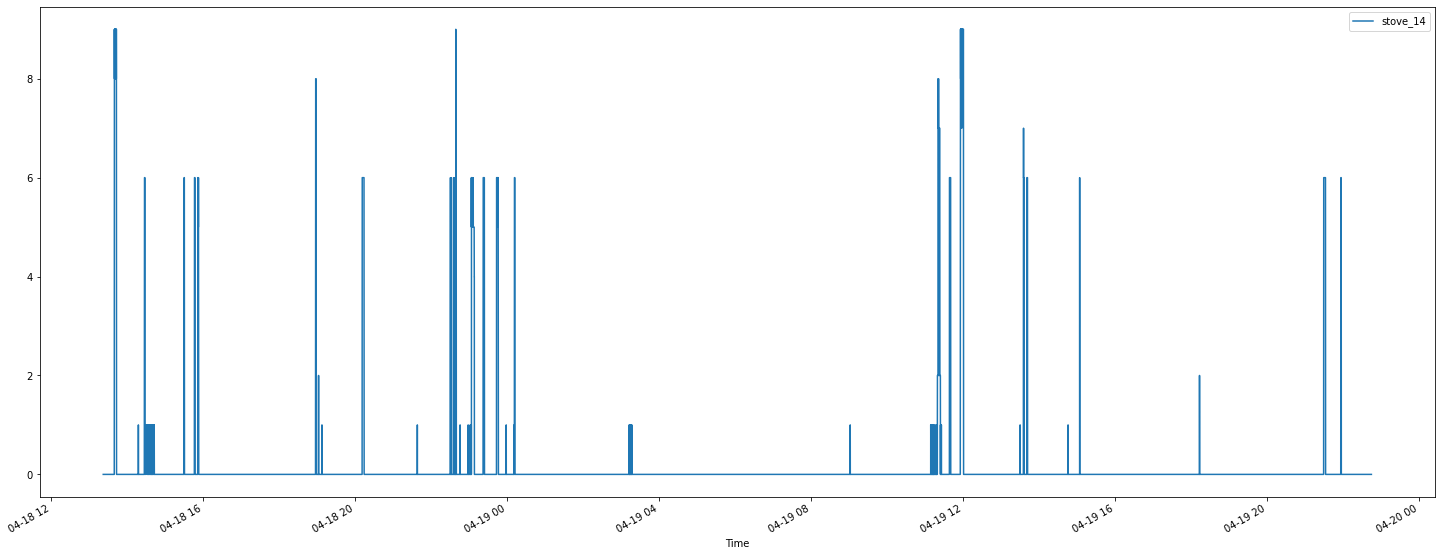

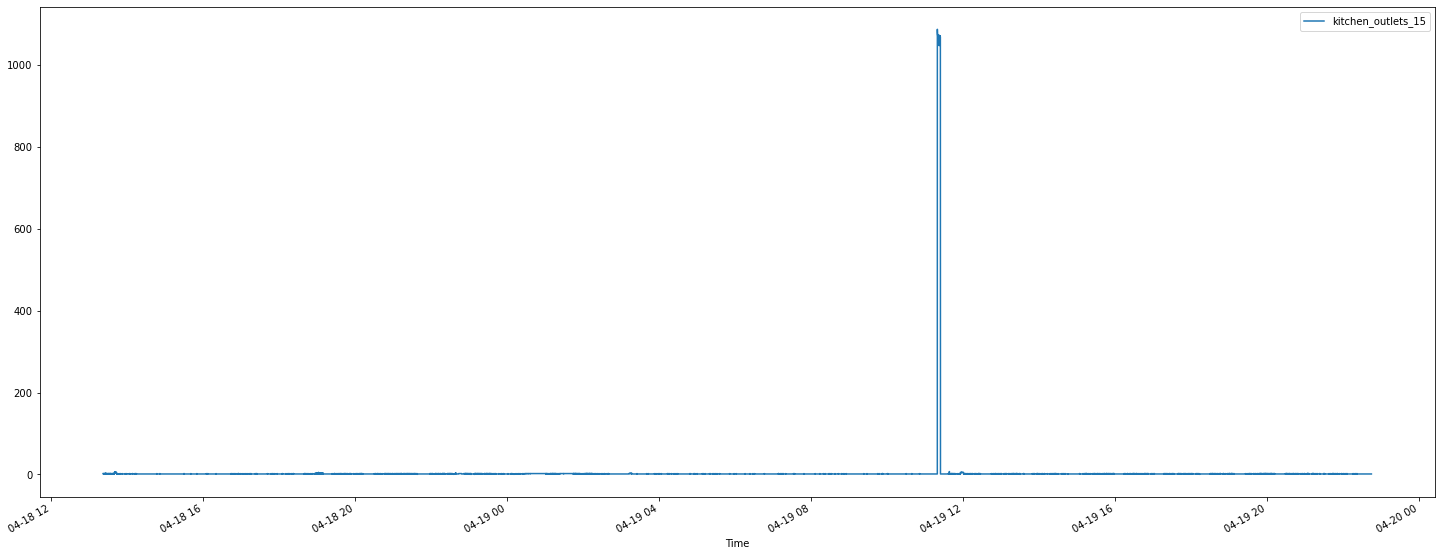

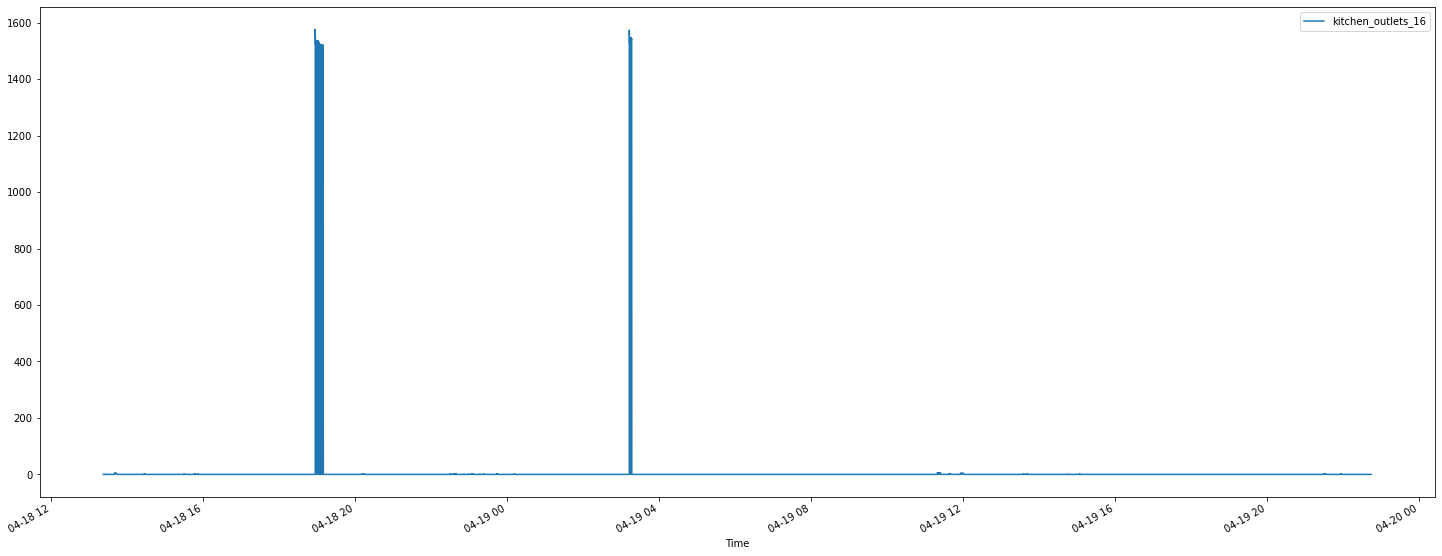

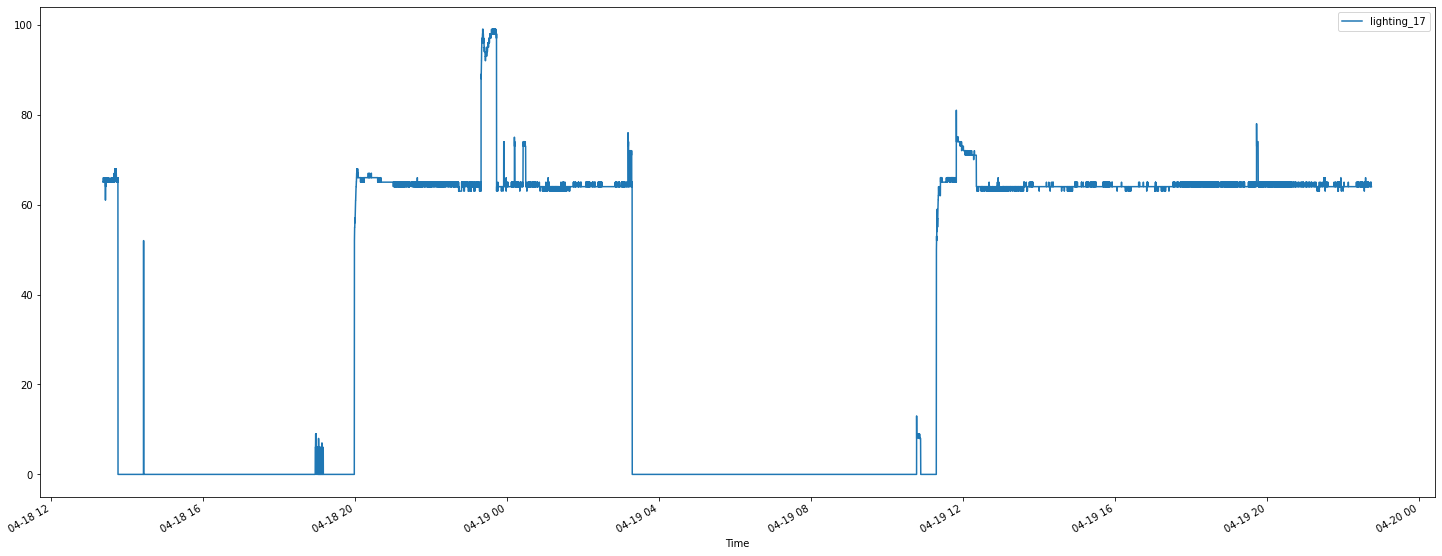

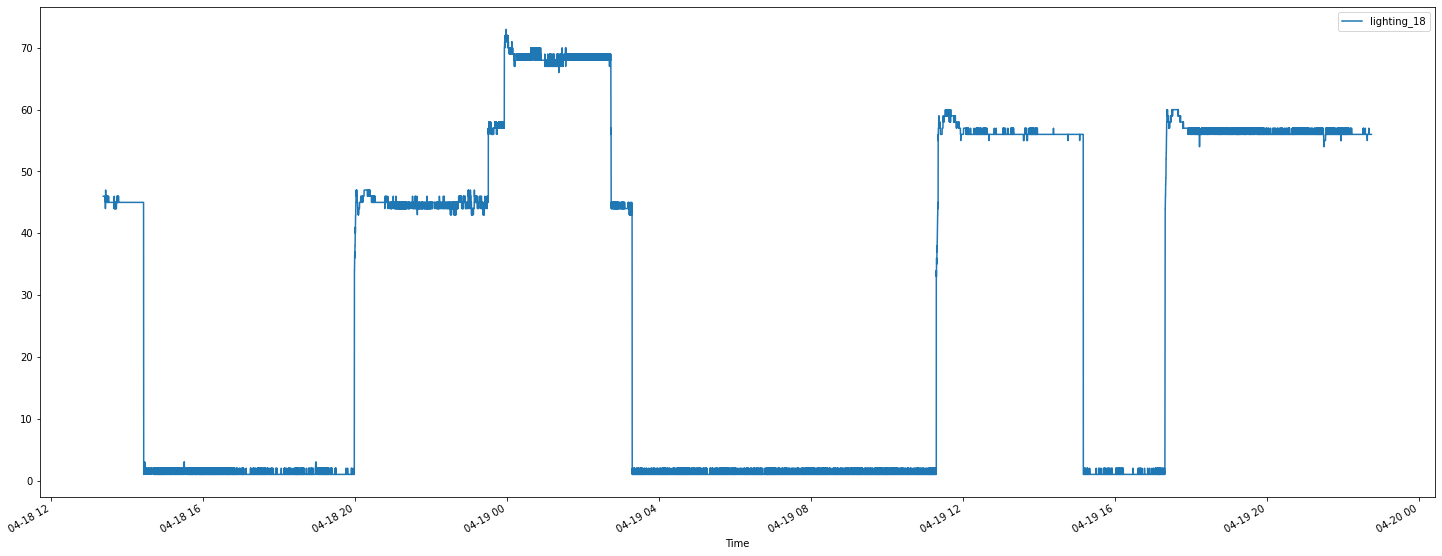

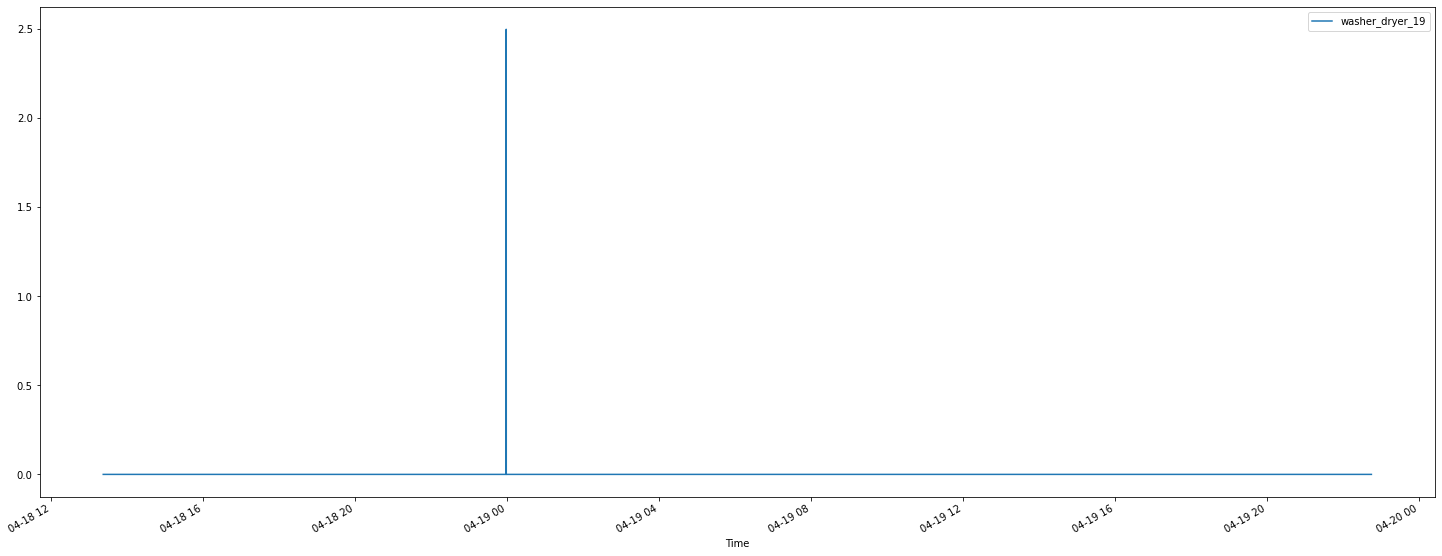

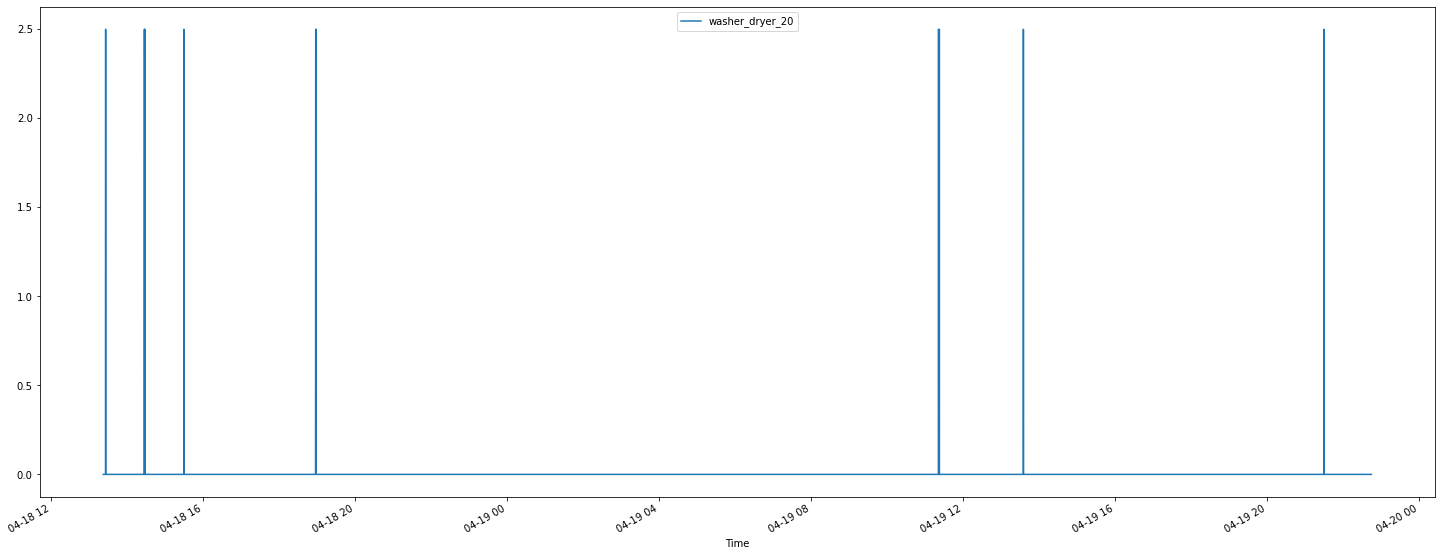

In [7]:
ind = ["mains_1", "mains_2","oven_3","oven_4","refrigerator_5","dishwaser_6","kitchen_outlets_7","kitchen_outlets_8","lighting_9","washer_dryer_10","microwave_11","bathroom_gfi_12","electric_heat_13","stove_14","kitchen_outlets_15","kitchen_outlets_16","lighting_17","lighting_18","washer_dryer_19","washer_dryer_20"]
from matplotlib.pyplot import figure
print("\n\n                                                       HOUSE 1\n\n")
for i in range(len(ind)):
    df.set_index('Time')[[ind[i]]].plot(subplots=True)

In [8]:
df = pd.read_csv('House1.csv')
df['Time']= pd.to_datetime(df['Time'])

In [9]:
df = df.iloc[:, 3:]
df

,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
0,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
1,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
3,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
4,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406743,0.0,0.0,186.0,1.0,26.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
406744,0.0,0.0,187.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
406745,0.0,0.0,190.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
406746,0.0,0.0,189.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Text(0.5, 1.0, 'House 1')

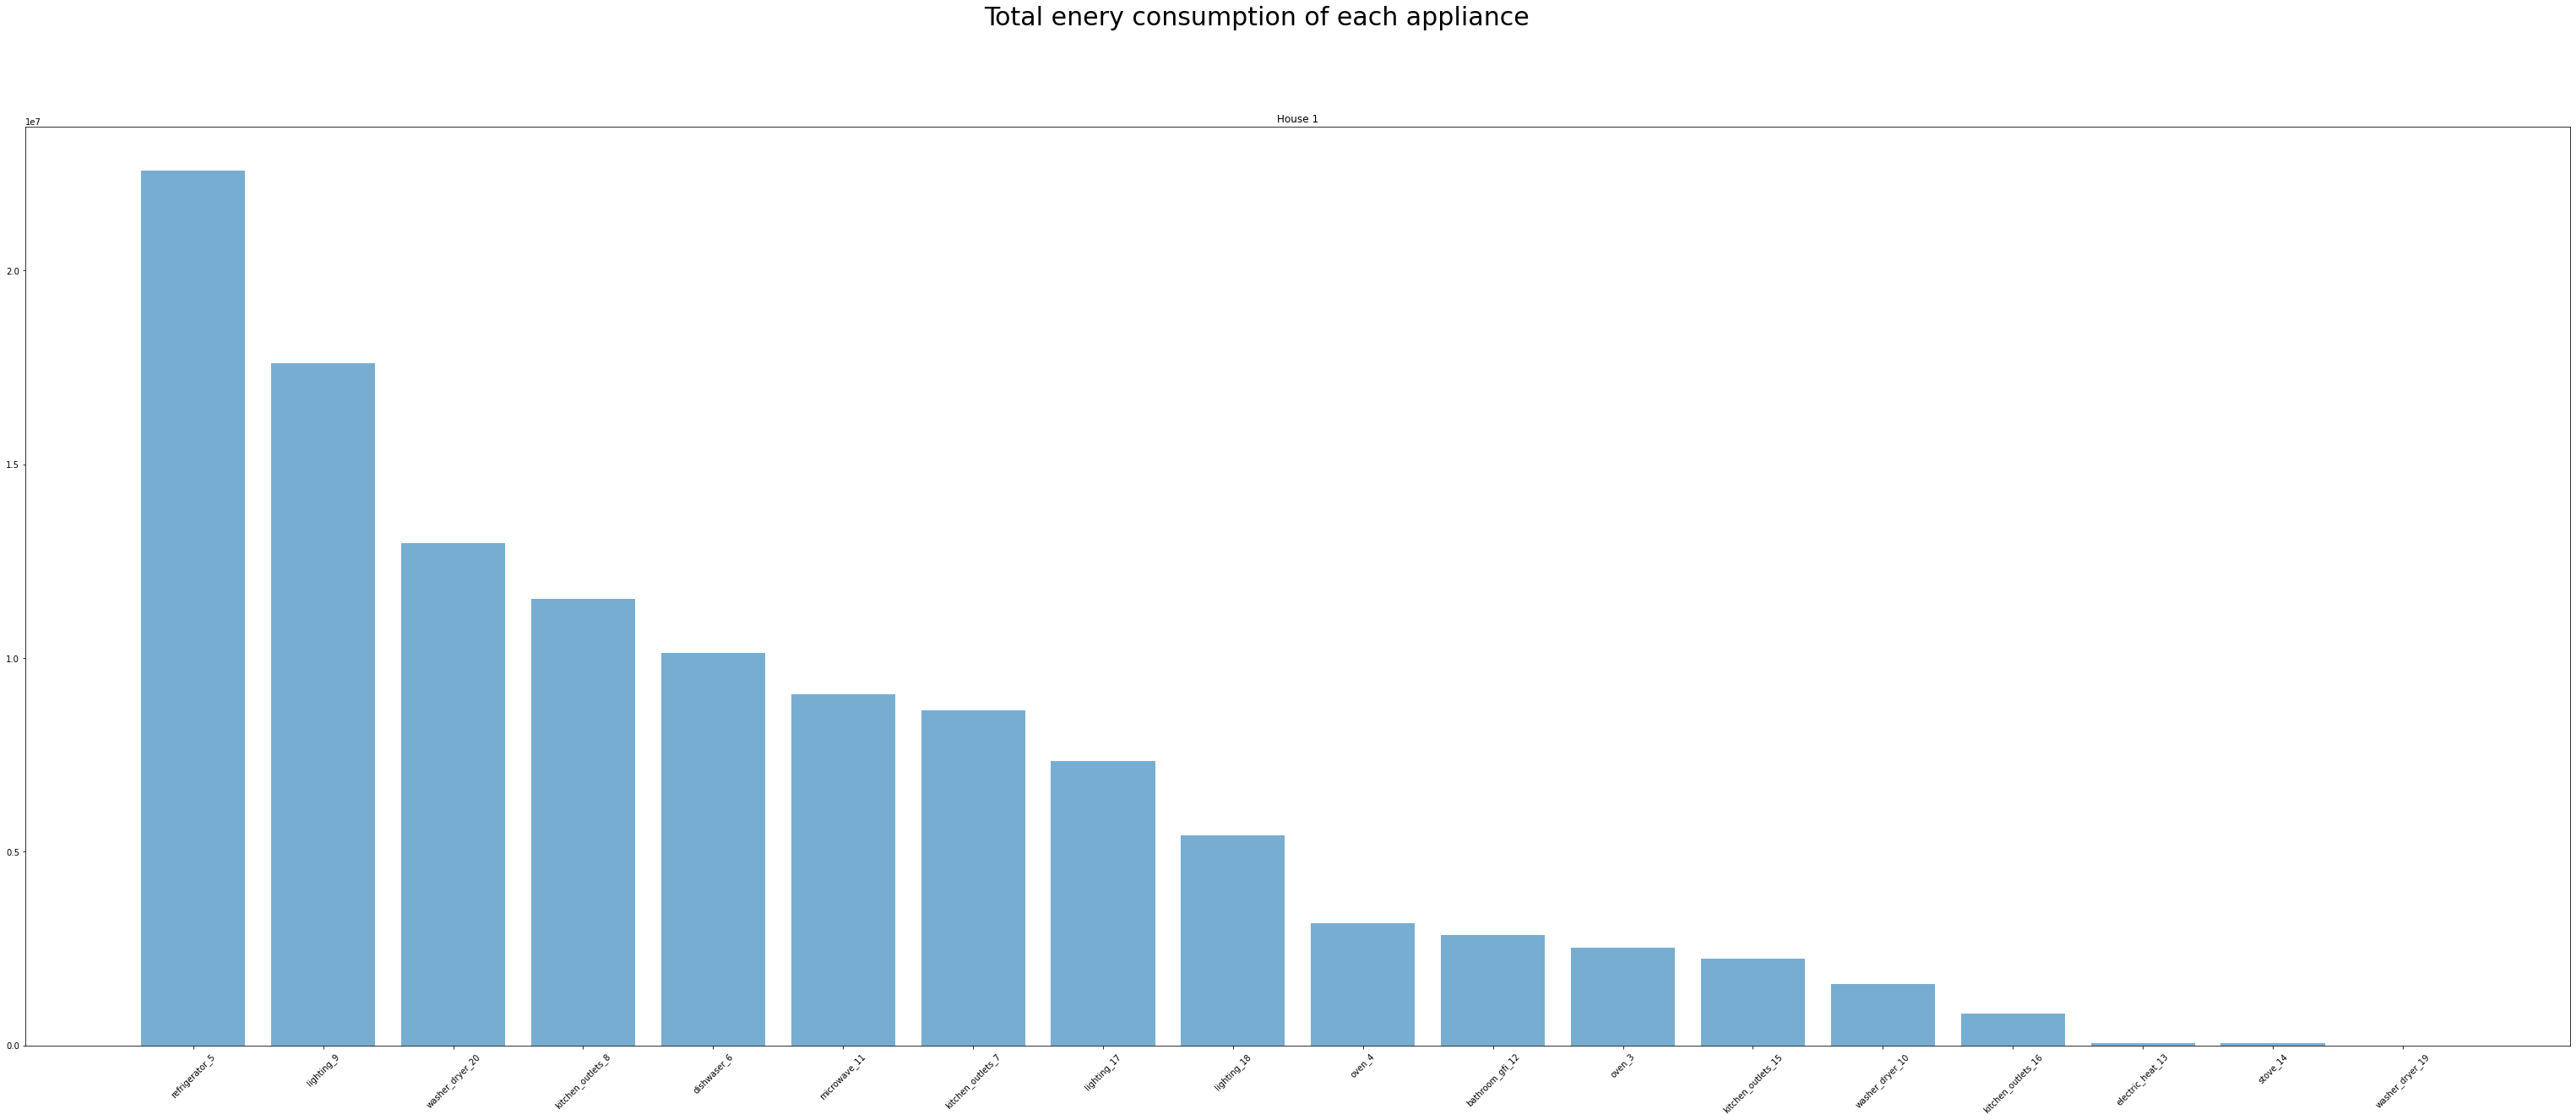

In [10]:
fig, axes = plt.subplots(1,1,figsize=(54, 20))
plt.suptitle('Total enery consumption of each appliance', fontsize = 30)
cons1 = df.sum().sort_values(ascending=False)
app1 = cons1.index
y_pos1 = np.arange(len(app1))
axes.bar(y_pos1, cons1.values,  alpha=0.6) 
plt.sca(axes)
plt.xticks(y_pos1, app1, rotation = 45)
plt.title('House 1')

In [11]:
conda install tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow -> python[version='2.7.*|3.7.*|3.6.*|3.5.*']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
cha

In [12]:
# !conda install keras-tcn
# !conda install keras-tcn --no-dependencies  # without the dependencies if you already have TF/Numpy.

In [ ]:
from tcn import TCN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential